<a href="https://colab.research.google.com/github/MBD-PT-3rd-term-IE/deep_learning_mbd_pt_2023/blob/main/pedro_android_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

Mon Mar  6 20:55:27 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P0    24W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **27.01.2023** with version **YOLOv8.0.20**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 25.6/78.2 GB disk)


In [ ]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -qe ultralytics

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics 

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://v8docs.ultralytics.com/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Inference with Pre-trained COCO Model

### 💻 CLI

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

/content
100% 6.23M/6.23M [00:00<00:00, 14.4MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
100% 104k/104k [00:00<00:00, 4.94MB/s]
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 19.3ms
Speed: 0.7ms pre-process, 19.3ms inference, 52.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


/content


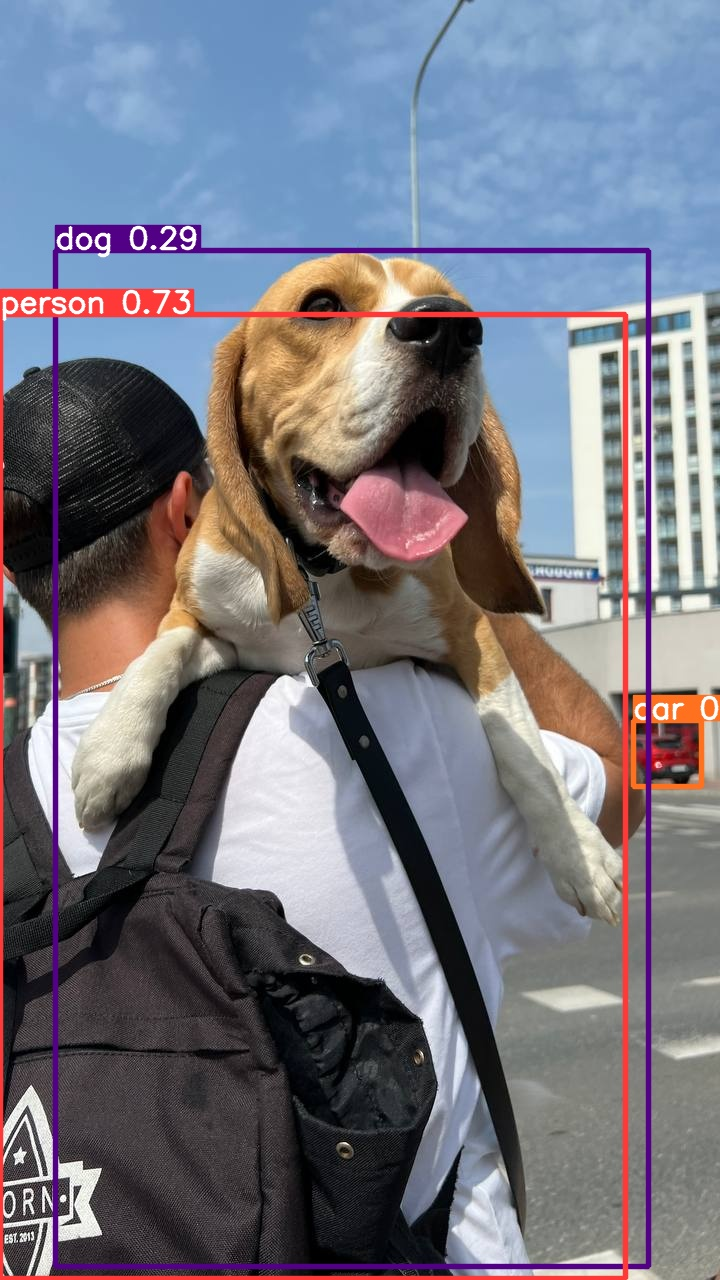

In [ ]:
%cd {HOME}
Image(filename='runs/detect/predict/dog.jpeg', height=600)

### 🐍 Python SDK

The simplest way of simply using YOLOv8 directly in a Python environment.

In [ ]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg


In [ ]:
results[0].boxes.xyxy

tensor([[   0.,  314.,  625., 1278.],
        [  55.,  250.,  648., 1266.],
        [ 633.,  720.,  701.,  786.]], device='cuda:0')

In [ ]:
results[0].boxes.conf

tensor([0.72712, 0.29066, 0.28456], device='cuda:0')

In [ ]:
results[0].boxes.cls

tensor([ 0., 16.,  2.], device='cuda:0')

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ow5C8sx8oFEDnaMQ6CNv")
project = rf.workspace("data-dynamos").project("streets-and-crosswalks")
dataset = project.version(19).download("yolov8")


/content/datasets
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 KB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 8.5 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=8d4a05cad7a91759ff77339bc21e0654a38f115778362fc295530a5281f05acf
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: cycler
    Found existing installation: cycler 0.11.0
    Uninstalling cycler-0.11.0:
      Successfully uninstalled cycler-0.11.0


loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Streets-and-Crosswalks-19 in yolov8:: 100%|██████████| 2398/2398 [00:01<00:00, 2283.84it/s]


## Custom Training
# Putting only 6 epochs for faster deployment

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=6 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 45.9MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/Streets-and-Crosswalks-19/data.yaml, epochs=6, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscrip

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    train_batch1.jpg
confusion_matrix.png				    train_batch2.jpg
events.out.tfevents.1678136206.ec090a89e0de.3739.0  val_batch0_labels.jpg
F1_curve.png					    val_batch0_pred.jpg
P_curve.png					    val_batch1_labels.jpg
PR_curve.png					    val_batch1_pred.jpg
R_curve.png					    val_batch2_labels.jpg
results.csv					    val_batch2_pred.jpg
results.png					    weights
train_batch0.jpg


/content


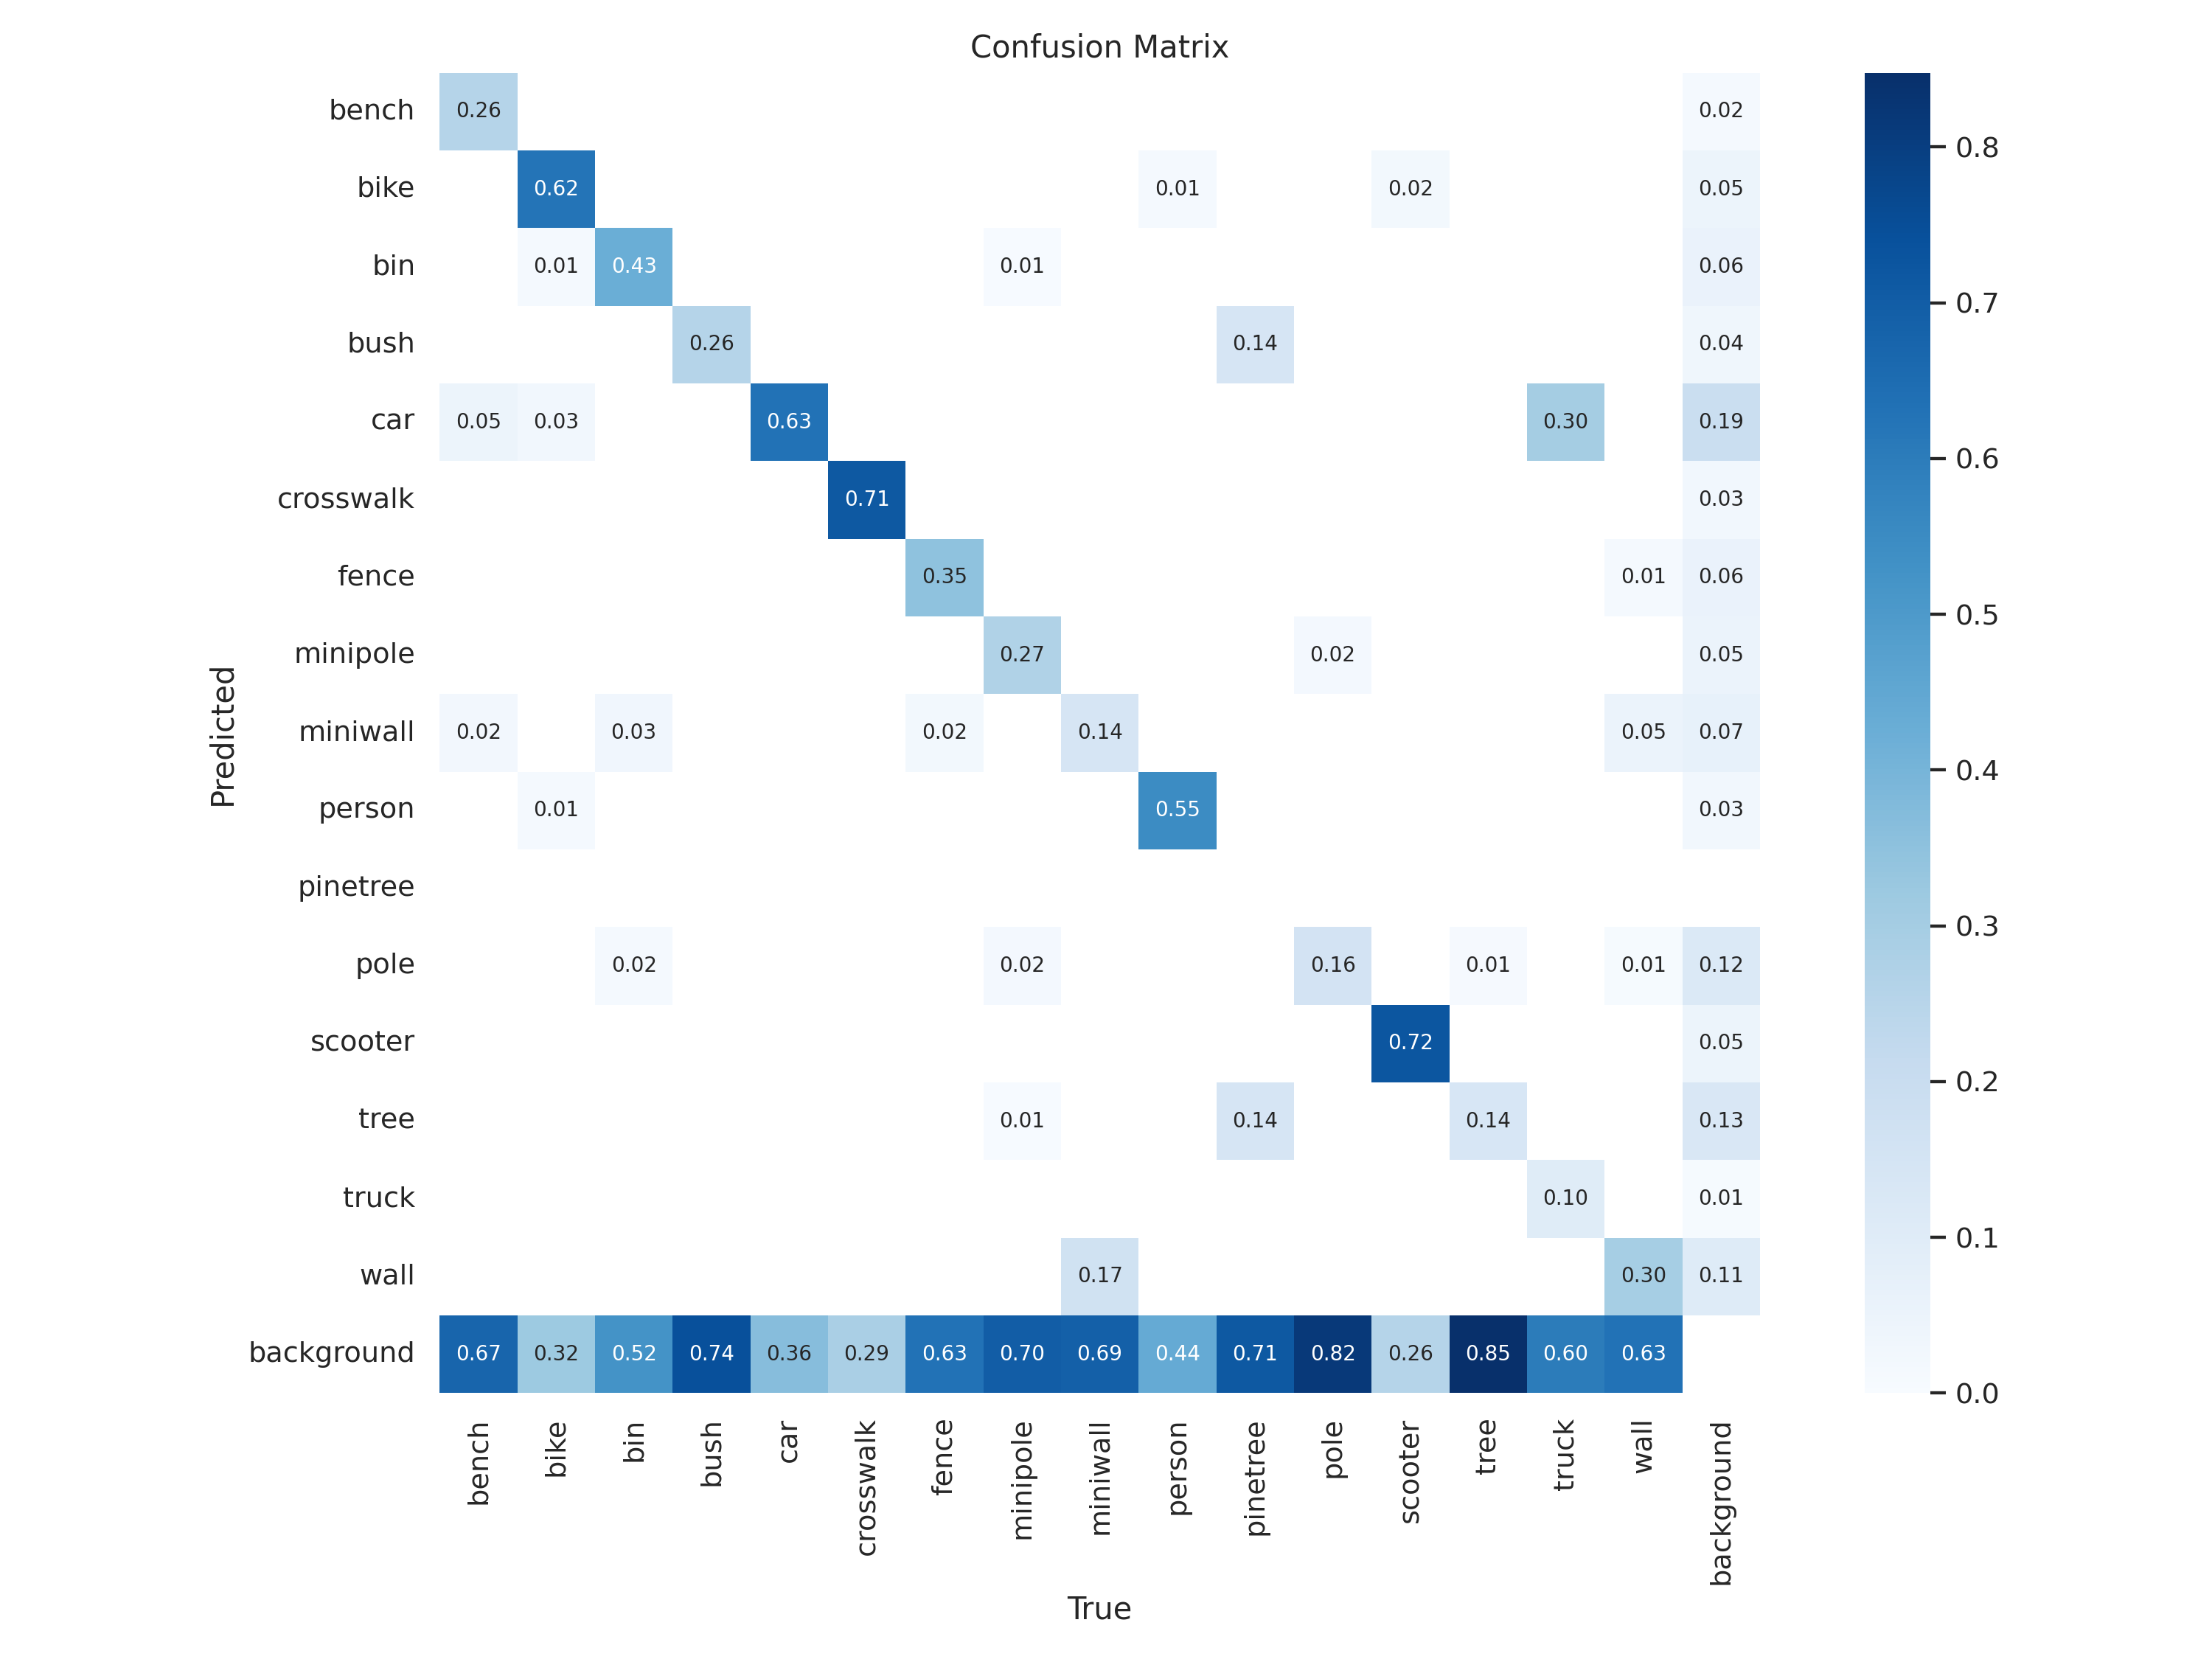

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


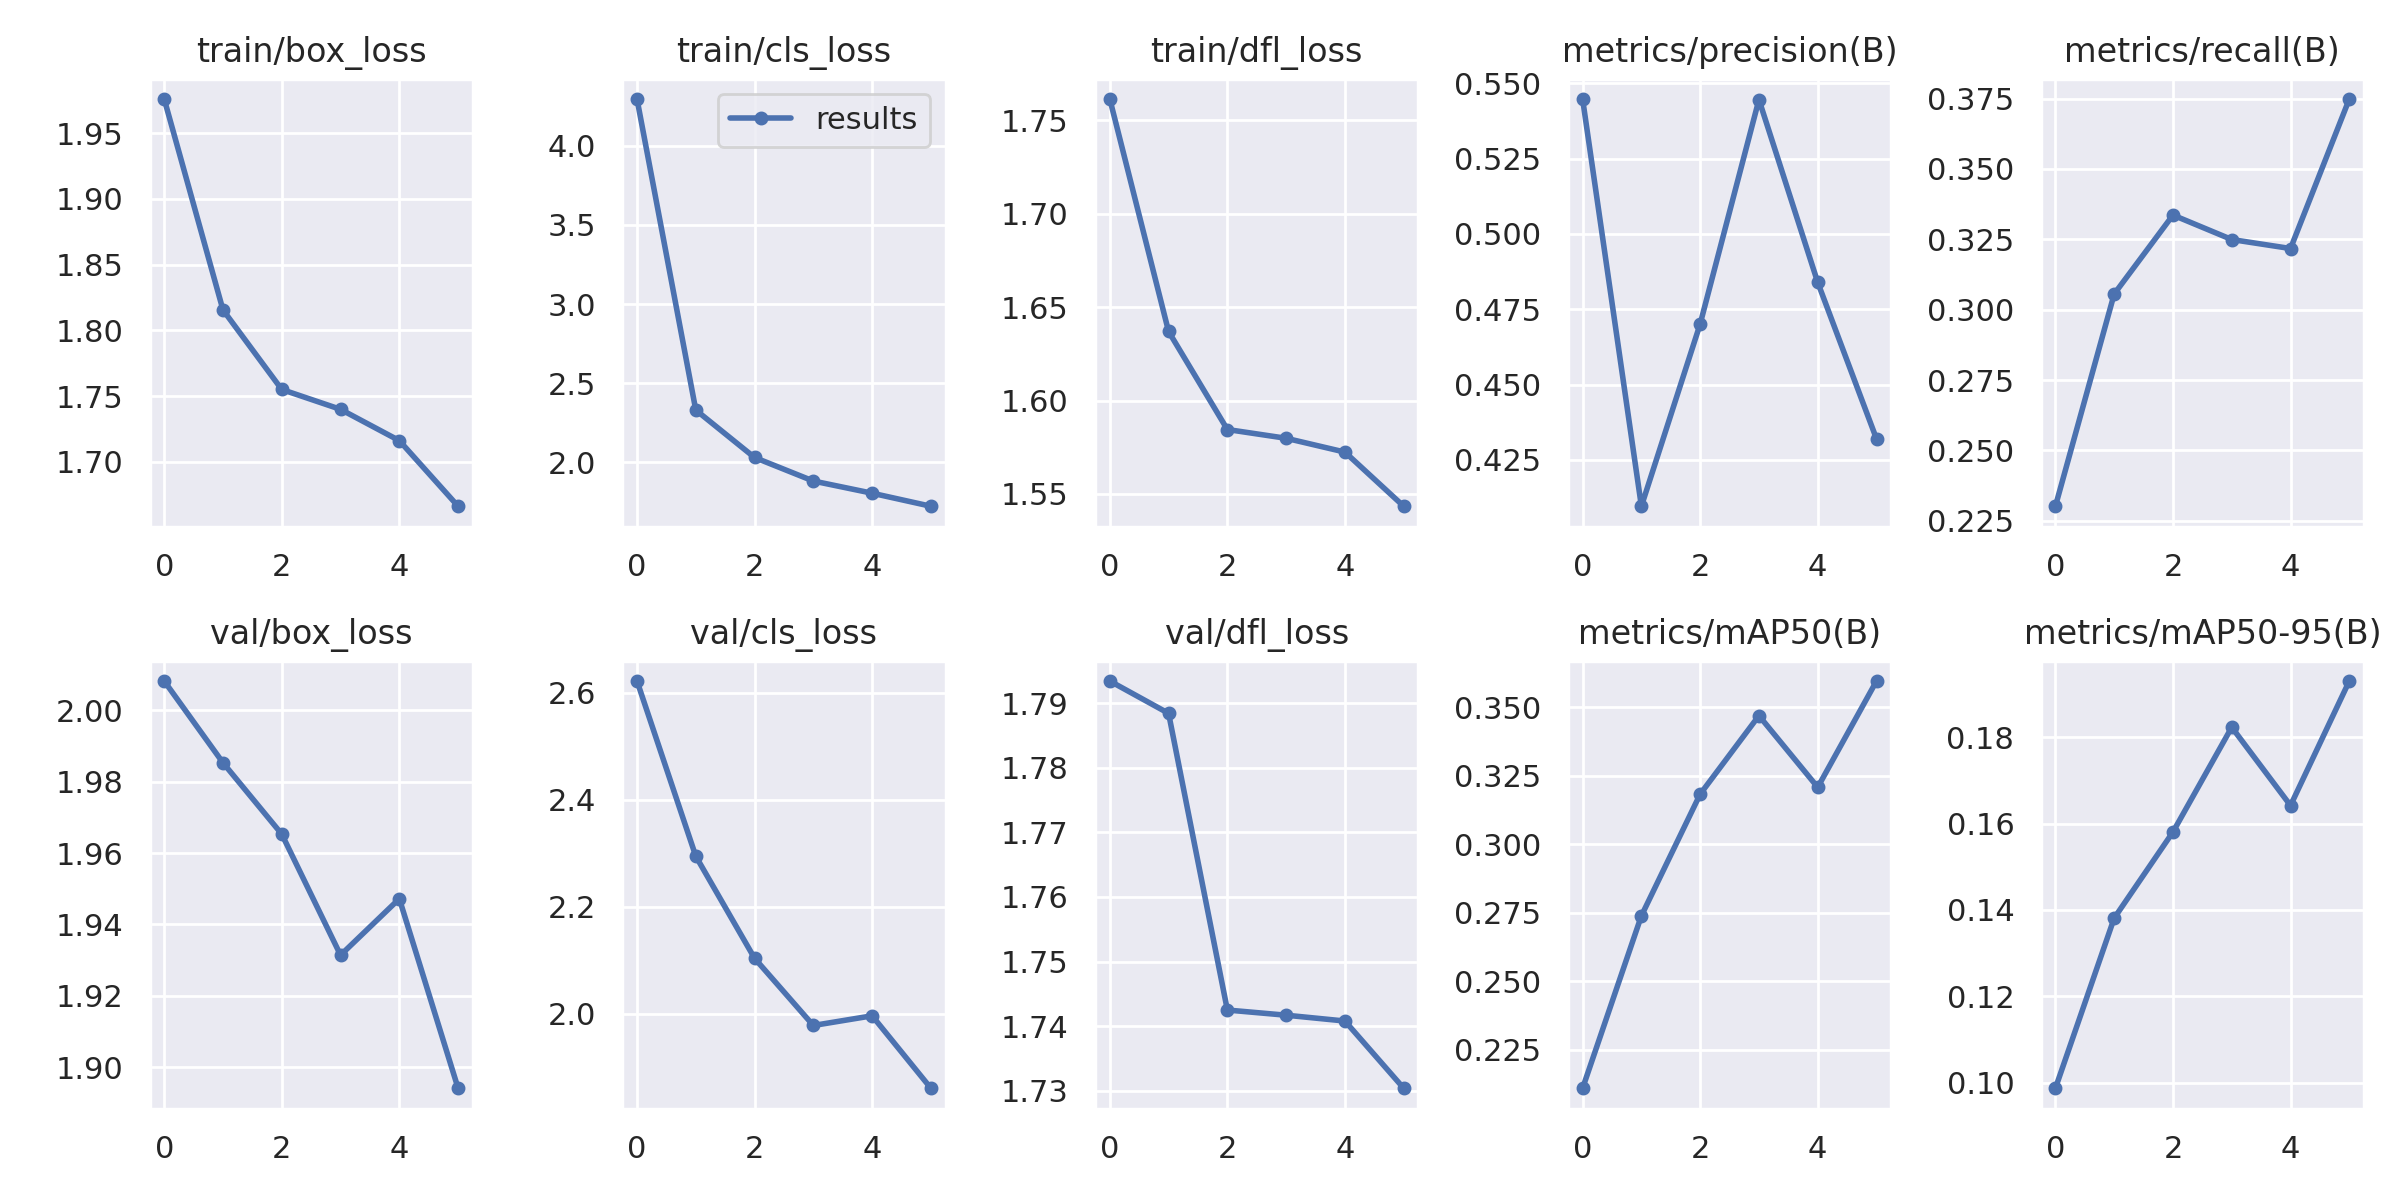

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


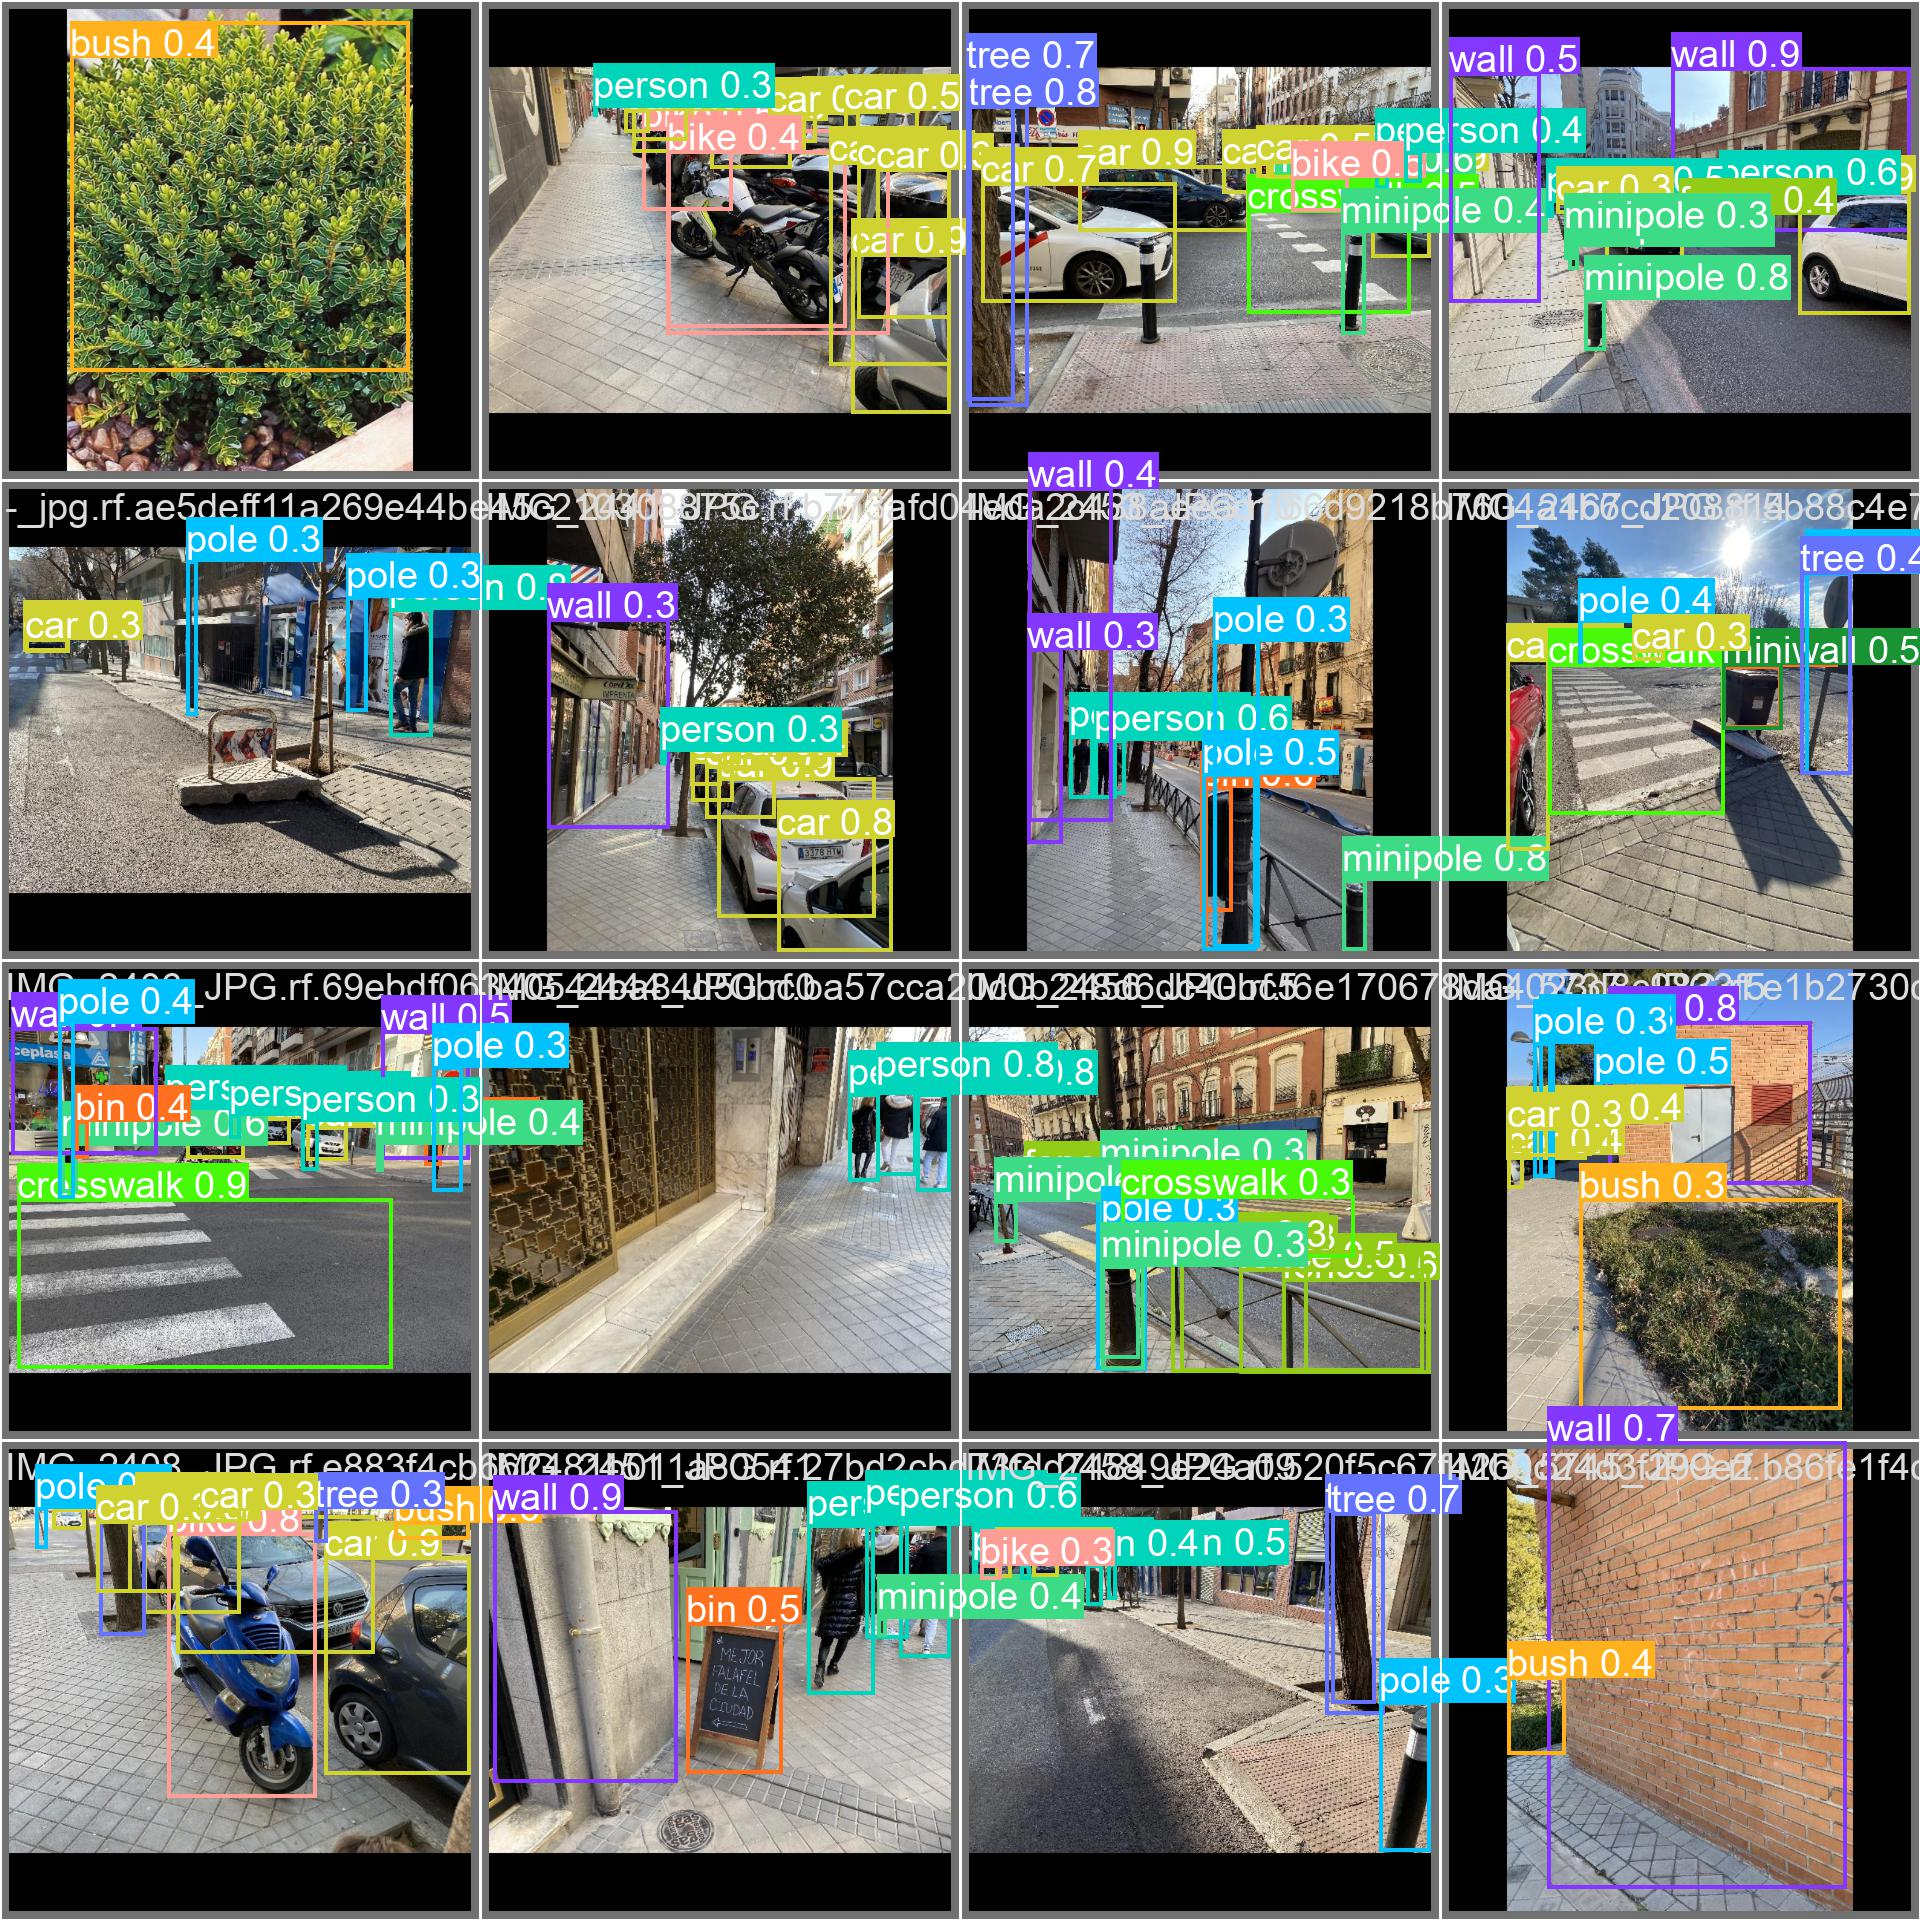

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11131776 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/datasets/Streets-and-Crosswalks-19/valid/labels.cache... 214 images, 0 backgrounds, 0 corrupt: 100% 214/214 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 28, len(boxes) = 1881. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 14/14 [00:13<00:00,  1.04it/s]
                   all        214       1881      0.432      0.375       0.36      0.193
                 bench        214         43      0.457      0.233      0.267      0.135
                  bike        214         72      0.542      0.625      0.606      0.312
          

## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11131776 parameters, 0 gradients, 28.5 GFLOPs
image 1/153 /content/datasets/Streets-and-Crosswalks-19/test/images/106_png.rf.786d2d0de660ccd6a590551da02ac272.jpg: 800x800 2 scooters, 26.1ms
image 2/153 /content/datasets/Streets-and-Crosswalks-19/test/images/108_png.rf.6a4afca8e52306e7797bebadfd9dc58a.jpg: 800x800 1 scooter, 26.1ms
image 3/153 /content/datasets/Streets-and-Crosswalks-19/test/images/109_png.rf.c5566384618d957be0e8ae055984be65.jpg: 800x800 1 miniwall, 1 person, 1 scooter, 26.1ms
image 4/153 /content/datasets/Streets-and-Crosswalks-19/test/images/11-2-_png.rf.4780797b568b3c12577571543f1cb36c.jpg: 800x800 1 bin, 1 miniwall, 2 scooters, 20.6ms
image 5/153 /content/datasets/Streets-and-Crosswalks-19/test/images/122-2-_png.rf.2d28b0e94d0a8f280778e1ea55400d7a.jpg: 800x800 2 scooters, 20.6ms
image 6/153 /content/datasets/Streets-and-Crosswalks-19/tes

**NOTE:** Let's take a look at few results.

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict3/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

## Deploy model on Roboflow

Once you have finished training your YOLOv8 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/detect/train/weights/best.pt` folder of your project. You can upload your model weights to Roboflow Deploy to use your trained weights on our infinitely scalable infrastructure.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) now supports uploading YOLOv8 weights.

To upload model weights, add the following code to the “Inference with Custom Model” section in the aforementioned notebook:

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

An error occured when getting the model upload URL: This version already has a trained model. Please generate and train a new version in order to upload model to Roboflow.


In [ ]:
#While your deployment is processing, checkout the deployment docs to take your model to most destinations https://docs.roboflow.com/inference

In [ ]:
#Run inference on your model on a persistant, auto-scaling, cloud API

#load model
model = project.version(dataset.version).model

#choose random test set image
import os, random
test_set_loc = dataset.location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
pred

running inference on 17-hekwerk_jpg.rf.7c31cbfdeccb0b3295033d1ffd1ac6d7.jpg


{'predictions': [{'x': 342.5,
   'y': 338.5,
   'width': 445.0,
   'height': 271.0,
   'confidence': 0.48750171065330505,
   'class': 'fence',
   'image_path': '/content/datasets/Streets-and-Crosswalks-19/test/images/17-hekwerk_jpg.rf.7c31cbfdeccb0b3295033d1ffd1ac6d7.jpg',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 48.5,
   'y': 383.0,
   'width': 97.0,
   'height': 116.0,
   'confidence': 0.4054027795791626,
   'class': 'miniwall',
   'image_path': '/content/datasets/Streets-and-Crosswalks-19/test/images/17-hekwerk_jpg.rf.7c31cbfdeccb0b3295033d1ffd1ac6d7.jpg',
   'prediction_type': 'ObjectDetectionModel'}],
 'image': {'width': '640', 'height': '640'}}

## 🏆 Congratulations

### Learning Resources

Roboflow has produced many resources that you may find interesting as you advance your knowledge of computer vision:

- [Roboflow Notebooks](https://github.com/roboflow/notebooks): A repository of over 20 notebooks that walk through how to train custom models with a range of model types, from YOLOv7 to SegFormer.
- [Roboflow YouTube](https://www.youtube.com/c/Roboflow): Our library of videos featuring deep dives into the latest in computer vision, detailed tutorials that accompany our notebooks, and more.
- [Roboflow Discuss](https://discuss.roboflow.com/): Have a question about how to do something on Roboflow? Ask your question on our discussion forum.
- [Roboflow Models](https://roboflow.com): Learn about state-of-the-art models and their performance. Find links and tutorials to guide your learning.

### Convert data formats

Roboflow provides free utilities to convert data between dozens of popular computer vision formats. Check out [Roboflow Formats](https://roboflow.com/formats) to find tutorials on how to convert data between formats in a few clicks.

### Connect computer vision to your project logic

[Roboflow Templates](https://roboflow.com/templates) is a public gallery of code snippets that you can use to connect computer vision to your project logic. Code snippets range from sending emails after inference to measuring object distance between detections.

# Android Preparation

In [ ]:
import torch


In [ ]:
!git clone https://github.com/callysthenes/YOLOv8


Cloning into 'YOLOv8'...
remote: Enumerating objects: 254, done.
remote: Counting objects: 100% (254/254), done.
remote: Compressing objects: 100% (218/218), done.
remote: Total 254 (delta 44), reused 242 (delta 35), pack-reused 0
Receiving objects: 100% (254/254), 6.63 MiB | 25.41 MiB/s, done.
Resolving deltas: 100% (44/44), done.


In [ ]:
%cd /content/YOLOv8


/content/YOLOv8


In [44]:
!python export.py --weights /content/runs/detect/train/weights/best.pt --img 800

Traceback (most recent call last):
  File "export.py", line 1, in <module>
    from ultralytics import YOLO
  File "/content/YOLOv8/ultralytics/__init__.py", line 5, in <module>
    from ultralytics.hub import checks
  File "/content/YOLOv8/ultralytics/hub/__init__.py", line 10, in <module>
    from ultralytics.hub.auth import Auth
  File "/content/YOLOv8/ultralytics/hub/auth.py", line 5, in <module>
    from ultralytics.hub.utils import HUB_API_ROOT, request_with_credentials
  File "/content/YOLOv8/ultralytics/hub/utils.py", line 10, in <module>
    from ultralytics.yolo.utils import DEFAULT_CONFIG_DICT, LOGGER, RANK, SETTINGS, TryExcept, colorstr, emojis
  File "/content/YOLOv8/ultralytics/yolo/__init__.py", line 3, in <module>
    from . import v8
  File "/content/YOLOv8/ultralytics/yolo/v8/__init__.py", line 5, in <module>
    from ultralytics.yolo.v8 import classify, detect, segment
  File "/content/YOLOv8/ultralytics/yolo/v8/classify/__init__.py", line 3, in <module>
    from ult

In [ ]:
from hydra import *

In [ ]:
!pip install hydra
!pip install hydra.errors
!pip install omegaconf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement hydra.errors (from versions: none)
ERROR: No matching distribution found for hydra.errors
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install -r requirements.txt

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


In [ ]:
from tqdm import tqdm
import IProgress
from ipywidgets import IntProgress


ModuleNotFoundError: ignored

In [ ]:
torch.cuda.get_arch_list()